# Customer Churn Analysis
**This notebook is divided into the following sections:**

1. Importing the data
2. Understanding the data
3. Data Manipulation
4. Data Visualization
5. Implement ML Models
6. Model Evaluation
7. Final Conclusions


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Importing the data
Data Source: **Telco Customer Churn dataset**

In [ ]:
# Upload the dataset file on colab notebook
from google.colab import files
files.upload()

In [ ]:
# Read and display the file
df = pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [ ]:
# Check for columns having null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Replace empty values with NaN
df[df.loc[:,:] == ' '] = np.NaN

In [ ]:
# Now check if NaN values (formerly empty values) are present
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
# Count NaN values present in the columns
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Display the rows having NaN values in TotalCharges column
print(df[df.isna().any(axis=1)])

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
488   4472-LVYGI  Female              0  ...          52.55          NaN     No
753   3115-CZMZD    Male              0  ...          20.25          NaN     No
936   5709-LVOEQ  Female              0  ...          80.85          NaN     No
1082  4367-NUYAO    Male              0  ...          25.75          NaN     No
1340  1371-DWPAZ  Female              0  ...          56.05          NaN     No
3331  7644-OMVMY    Male              0  ...          19.85          NaN     No
3826  3213-VVOLG    Male              0  ...          25.35          NaN     No
4380  2520-SGTTA  Female              0  ...          20.00          NaN     No
5218  2923-ARZLG    Male              0  ...          19.70          NaN     No
6670  4075-WKNIU  Female              0  ...          73.35          NaN     No
6754  2775-SEFEE    Male              0  ...          61.90          NaN     No

[11 rows x 21 columns]


### Data Manipulation

In [ ]:
# Dealing with NaN values
display(df[df.isna().any(axis=1)])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Options considered to deal with NaN values under TotalCharges column:**

1. Multiply monthly charges with customer's tenure to get approximate total charges values. Since tenure length is also zero for these customers, so this option wasn't utilized.
2. Replace NaNs with mean/scalar values. But the data is not ordered along that column for this operation to be feasible.
3. Drop 11 out of 7043 rows containing NaN values. This operation removes an extremely small amount of data at relatively no cost to further analysis.



In [ ]:
# Drop the NaN values and adjust the indexing
df = df.dropna().reset_index(drop=True)

**Data pre-processing**

In [ ]:
# Copy the original dataframe to a new one without the customerID column
df1 = df.iloc[:,1:].copy()
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Label encoding the selected columns in the copy dataframe for statistical analysis
label_encoder = preprocessing.LabelEncoder()
cols = [0,2,3,5,6,7,8,9,10,11,12,13,14,15,16,19]

for i in df1.columns[cols]:
  df1[i] = label_encoder.fit_transform(df1[i])

# Convert TotalCharges column to float type, similar to MonthlyCharges column
df1['TotalCharges'] = df1['TotalCharges'].astype(float)
df1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [ ]:
# Check the data types
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

**Check for Outliers**

In [ ]:
# Display statistical summary
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


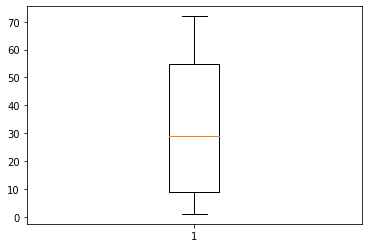

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57b55a510>]],
      dtype=object)

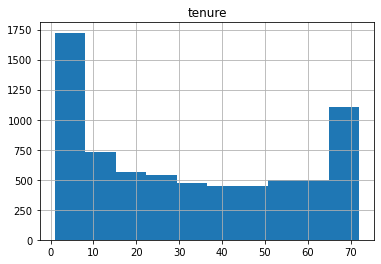

In [ ]:
# Plot boxplot & histogram for relevant columns
plt.boxplot(df1['tenure'])
plt.show()
df1.hist(column='tenure')

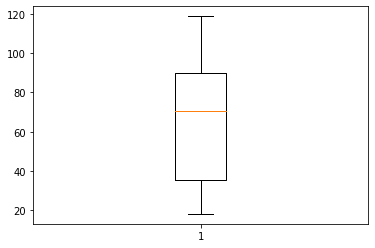

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57b3fb090>]],
      dtype=object)

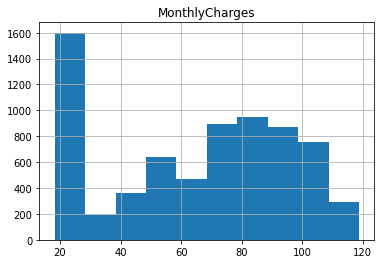

In [ ]:
plt.boxplot(df1['MonthlyCharges'])
plt.show()
df1.hist(column='MonthlyCharges')

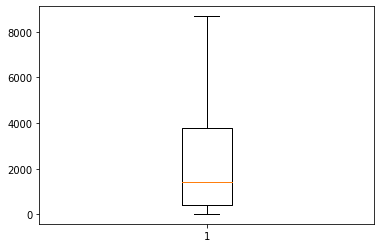

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57b49be50>]],
      dtype=object)

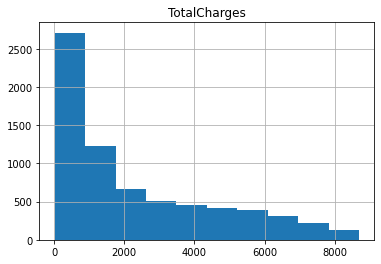

In [ ]:
plt.boxplot(df1['TotalCharges'])
plt.show()
df1.hist(column='TotalCharges')

In [ ]:
# Check for values above 0.99 quantile in TotalCharges column
q_high = df1['TotalCharges'].quantile(0.99)
df1[df1['TotalCharges'] > q_high]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
193,0,0,1,1,72,1,2,1,2,2,2,0,2,2,2,0,1,109.70,8129.30,0
198,1,0,1,1,72,1,2,1,0,2,2,2,2,2,2,1,0,112.25,8041.65,0
369,1,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,1,112.60,8126.65,0
437,1,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,1,114.05,8468.20,0
464,1,1,1,0,72,1,2,1,2,2,2,2,2,2,2,1,0,116.05,8404.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,1,0,0,0,71,1,2,1,2,2,2,2,2,2,1,1,0,116.30,8309.55,0
6394,1,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,0,116.60,8337.45,0
6557,1,0,1,1,70,1,2,1,2,2,2,2,2,2,2,1,1,116.55,8152.30,0
6718,0,0,1,0,72,1,2,1,2,2,2,2,2,2,2,0,2,115.15,8349.70,0


**Outlier conclusion:** There doesn't seem to be any outlier that may impact our models' performance.

---

Next, we check for multi-collinearity using VIF (Variable Inflation Factors).

In [ ]:
# Calculate VIF for all independent variables
def calc_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  
  return(vif)

X = df1.iloc[:,:-1]
calc_vif(X)

,Variables,VIF
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


**Multi-collinearity fix:**

Columns *tenure*, *PhoneService*, *MonthlyCharges*, and *TotalCharges* have high VIF values. Nevertheless, we should only drop *PhoneService* column as others are of high importance for model evaluation. The changes are made in the copy dataframe and the original one is kept unchanged for data visualization.

In [ ]:
# Drop the column causing multi-collinearity and check VIF values again
df1 = df1.drop(columns = ['PhoneService'], axis=1)
calc_vif(df1.iloc[:,:-1])

,Variables,VIF
0,gender,1.947340
1,SeniorCitizen,1.366233
2,Partner,2.818484
3,Dependents,1.953141
4,tenure,14.619043
5,MultipleLines,2.683622
6,InternetService,2.676011
7,OnlineSecurity,2.225919
8,OnlineBackup,2.455360
9,DeviceProtection,2.627566


### Data Visualization

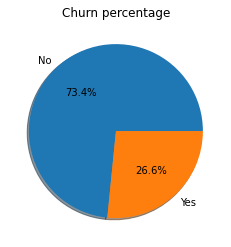

In [ ]:
# Check the customer churn percentage
labels =df['Churn'].value_counts(sort = True).index
dt = df['Churn'].value_counts(sort = True)
plt.pie(dt, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Churn percentage')
plt.show()

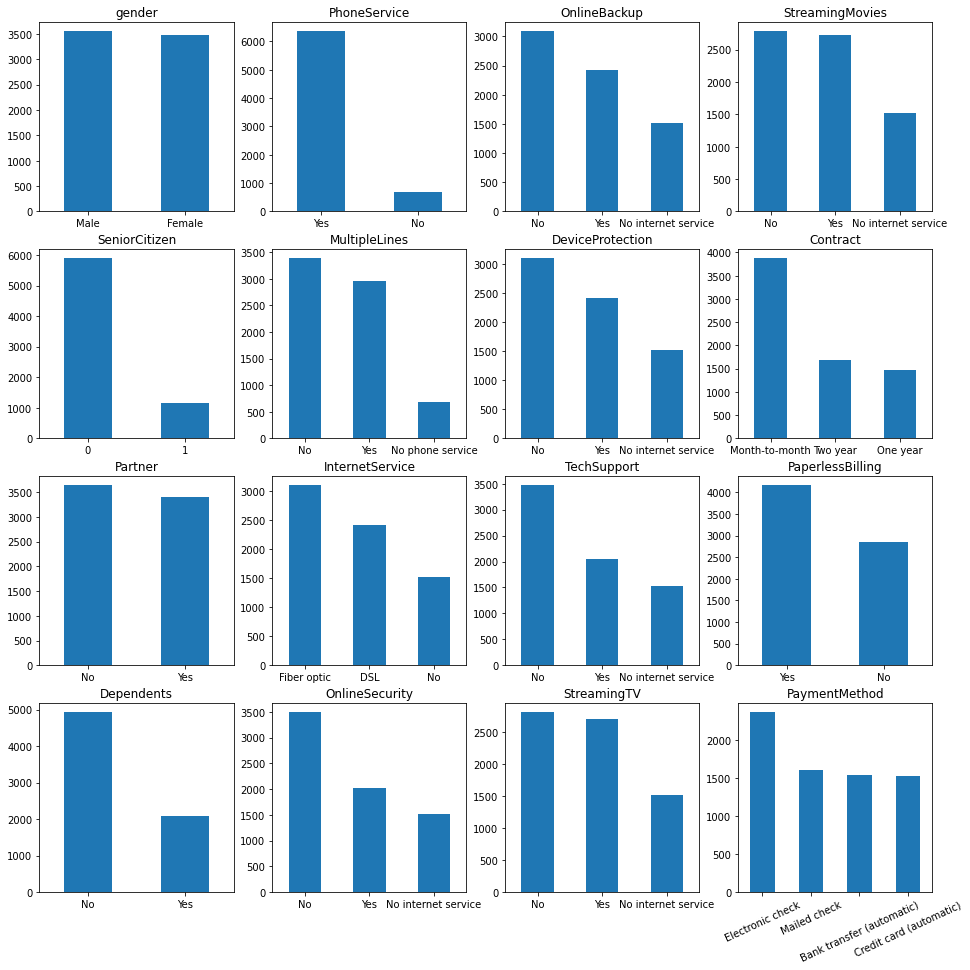

In [ ]:
# Display plots for different columns
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
             'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (16,16))

for i, val in enumerate(variables):
  if i < 4:
    ax = df[val].value_counts().plot(
    kind = 'bar', ax=axes[i,0], rot=0)
      
  elif i >=4 and i < 8:
    ax = df[val].value_counts().plot(
    kind = 'bar', ax=axes[i-4,1], rot=0)
      
  elif i >=8 and i < 12:
    ax = df[val].value_counts().plot(
    kind = 'bar', ax=axes[i-8,2], rot=0)

  elif i < 16:
    r=25 if i==15 else 0
    ax = df[val].value_counts().plot(
    kind = 'bar', ax=axes[i-12,3], rot=r)
  
  ax.set_title(val)

Text(0.5, 0, 'Total Charges')

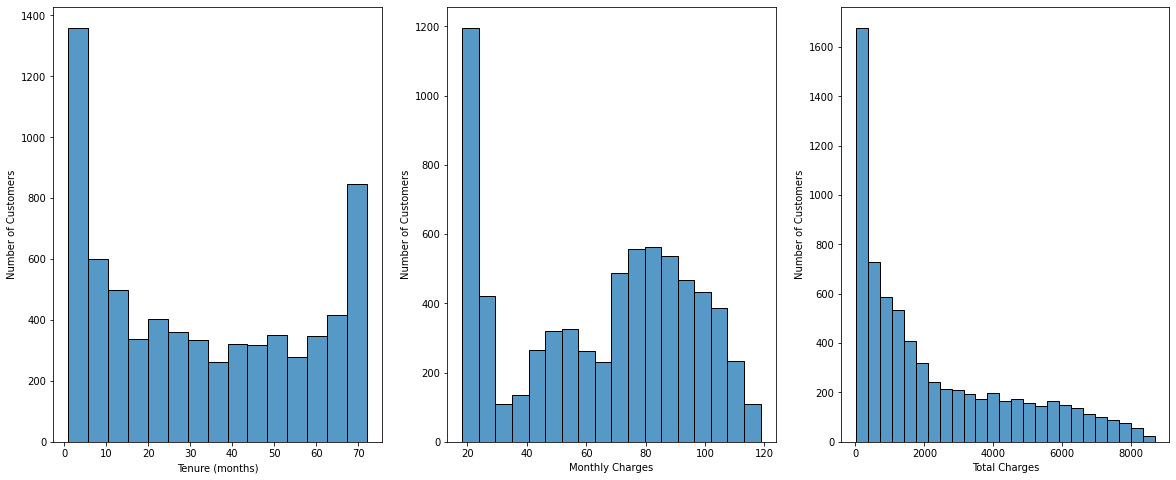

In [ ]:
# Plot histogram for tenure, monthly charges, and total charges
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20,8))

ax = sns.histplot(df['tenure'], ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')

ax = sns.histplot(df['MonthlyCharges'], ax=ax2)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Monthly Charges')

ax = sns.histplot(df1['TotalCharges'], ax=ax3)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Total Charges')

**Observations so far:**

* There is an almost equal *gender* distribution.
* There are way more *youngsters* than *senior people*.
* Nearly half the customers have *partners* while very few have *dependents*.
* Majority of the customers avail *phone service*, with almost half of them opting for *multiple line connection*.
* *Fiber optic* is the preferred choice for internet service, with *DSL* in a close second. Out of these, nearly half of the subscribers avail *streaming tv & movie* services.
* A minority of people prefer features such as *online security*, *online backup*, *device protection*, and *tech support*.
* Most of the customers are on a *monthly contract*.
* Regarding payment, *paperless billing* is the most favoured option, with *electronic check* taking the top spot.
* There are a vast number of customers with a *short tenure* (new customers) as well as quite a few long-time (loyal) customers.
* For *monthly charges*, many customers are on the lower end ($20). The same is true for *total charges*.

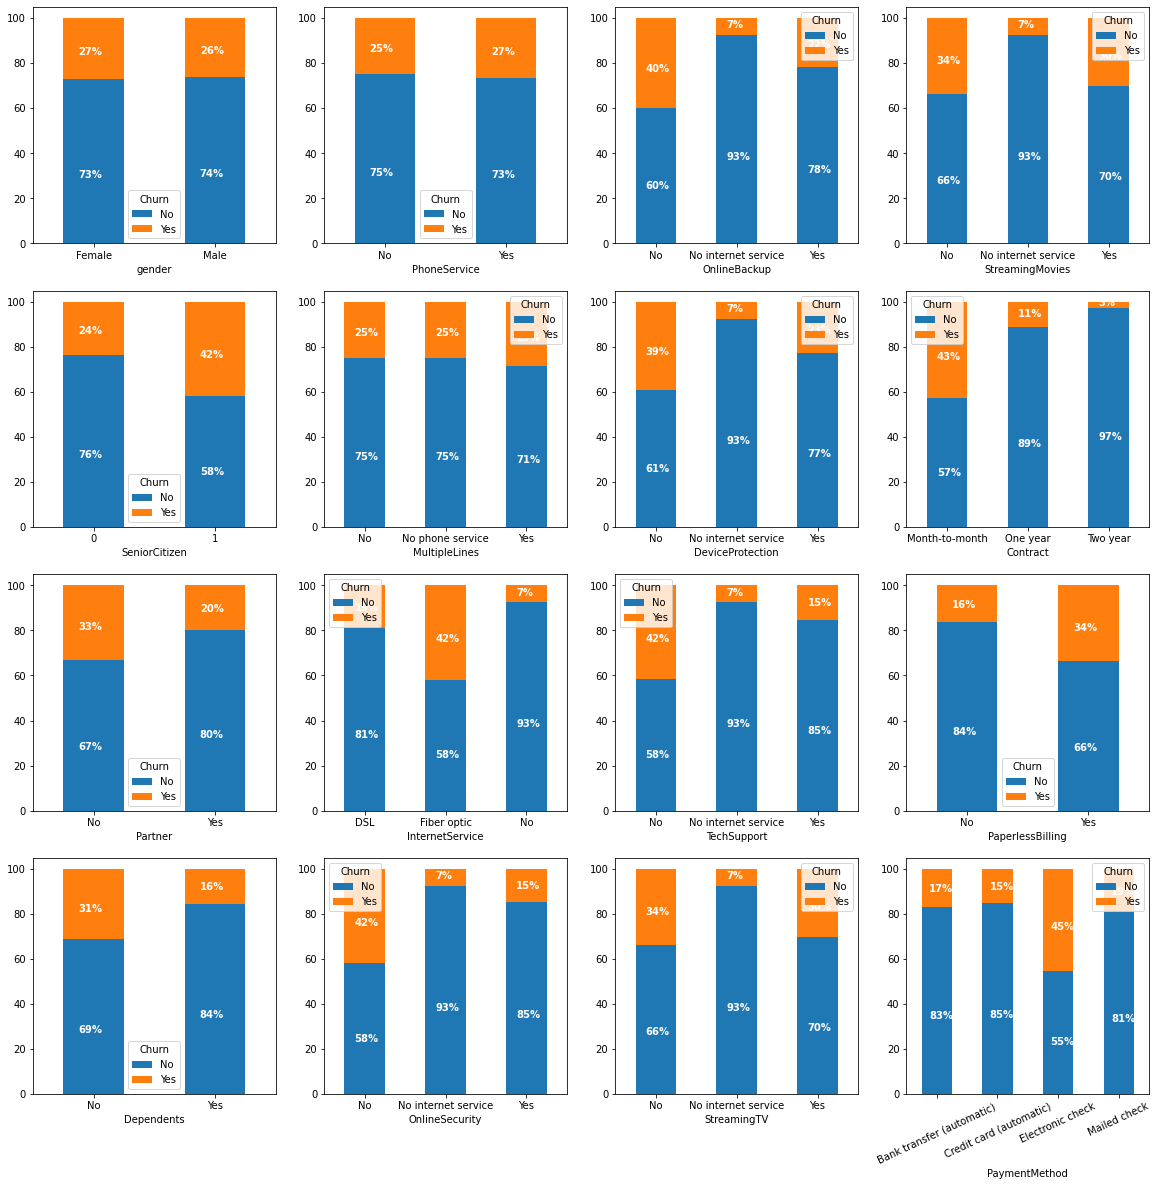

In [ ]:
# Display bar plots for different columns stacked with respective churn data
variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
             'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaperlessBilling', 'PaymentMethod']
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20,20))

for i, val in enumerate(variables):
  x = df.groupby([val,'Churn']).size().unstack()
  if i < 4:
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i,0], rot=0)
      
  elif i >=4 and i < 8:
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i-4,1], rot=0)
      
  elif i >=8 and i < 12:
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i-8,2], rot=0)

  elif i < 16:
    r=25 if i==15 else 0
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i-12,3], rot=r)
  
  # Add percentage values to the charts
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold')

Text(0.5, 1.0, 'Distribution of total charges by churn')

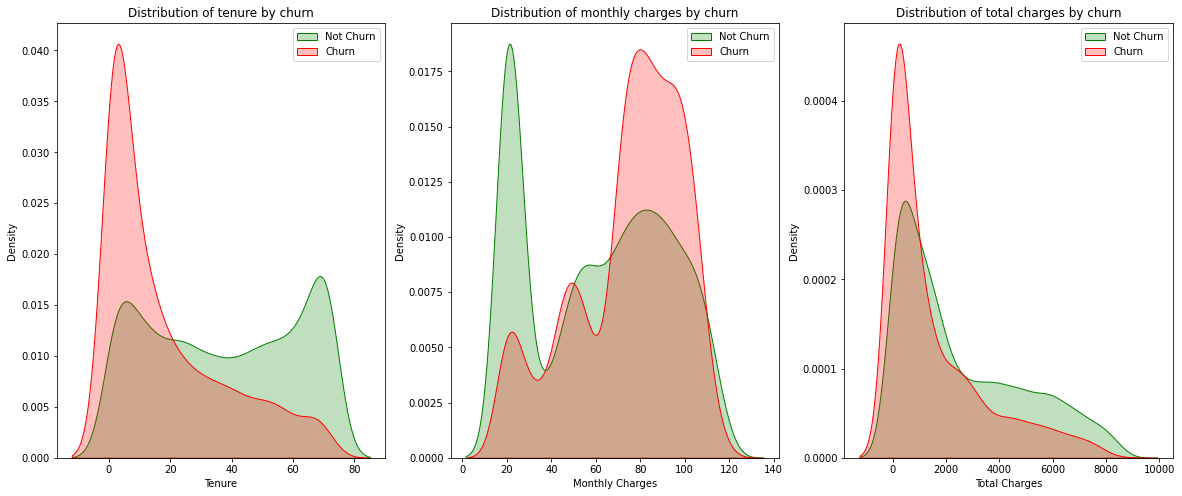

In [ ]:
# Display Kernel Density Estimate (KDE) plot for tenure, monthly charges, and total charges with churn data
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20,8))

ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No')], ax=ax1, color="Green", shade = True)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes')], ax=ax1, color="Red", shade= True)
ax.legend(["Not Churn", "Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], ax=ax2, color="Green", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], ax=ax2, color="Red", shade= True)
ax.legend(["Not Churn", "Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

ax = sns.kdeplot(df1.TotalCharges[(df["Churn"] == 'No')], ax=ax3, color="Green", shade = True)
ax = sns.kdeplot(df1.TotalCharges[(df["Churn"] == 'Yes')], ax=ax3, color="Red", shade= True)
ax.legend(["Not Churn", "Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

**Further observations:**

* In general, *gender*, *phone service*, and *multiple line connection* have no visible impact on customer churn.
* *Senior citizens* have a higher churn rate than *younger* generation.
* Customers having *partners* / *dependents* have a lower churn rate.
* Those who avail *fiber optic* are more prone to leave the service, while the connection doesn't create much of an impact for *streaming tv & movie* subscribers.
* Customer attrition is high for those who don't avail services such as *online security*, *online backup*, *device protection*, and *tech support*.
* Those on *monthly* contract are more likely to churn whereas the churn rate for customers on a *two-year* contract is almost negligible (mostly due to long-term commitment).
* Customers who prefer *paperless billing* (like *electronic check*) are more like to churn.
* Customers with *short tenure* (new customers) are more likely to leave the service (mainly because they opt for short-term contracts).
* More customers churn when the *monthly charges* are high although it is opposite for *total charges* (possibly due to not utilizing available services).

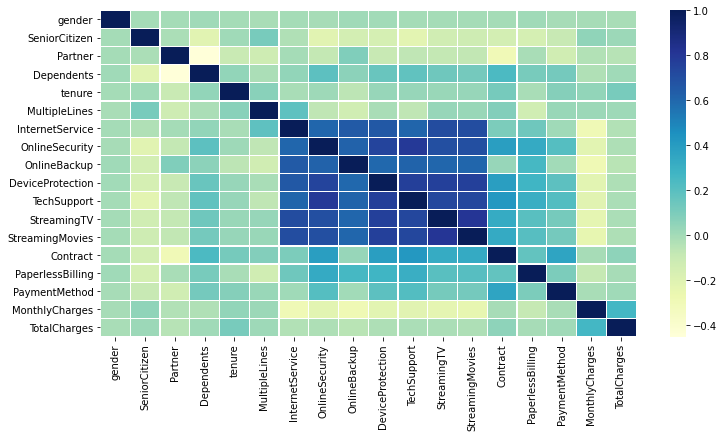

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 6))
corr = df1.iloc[:,:-1].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, cmap="YlGnBu")

As we can see, some features are redundant/less important/highly correlated. Although in our case we will let the models decide the correlation between the independent variables and churn, the following code can be executed to remove less important features.

In [ ]:
# Execute this to drop the less important features (as seen from EDA)
# df1 = df1.drop(columns = ['gender','StreamingMovies','OnlineSecurity'])

### Implement Machine Learning Models

In [ ]:
# Create X & y with data from independent and dependent variables respectively
y = df1['Churn'].values
X = df1.drop(columns = ['Churn'])

# Scale the variables (range=(0,1))
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Check their shapes
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (4922, 18)
y_train:  (4922,)
X_test:  (2110, 18)
y_test:  (2110,)


**Logistic Regression**

In [ ]:
# Model 1 - Logictic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Make predictions and print the accuracy
pred1 = model1.predict(X_test)
print("Accuracy: {:.2f}% \n".format(100 * accuracy_score(y_test, pred1)))
print(classification_report(y_test, pred1, target_names=['Negative','Positive']))

Accuracy: 79.15% 

              precision    recall  f1-score   support

    Negative       0.84      0.89      0.86      1549
    Positive       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



**Support Vector Classifier (SVC)**

In [ ]:
# Model 2 - Support Vector Classifier
model2 = SVC(kernel='linear') 
model2.fit(X_train, y_train)

# Make predictions and print the accuracy
pred2 = model2.predict(X_test)
print("Accuracy: {:.2f}% \n".format(100 * accuracy_score(y_test, pred2)))
print(classification_report(y_test, pred2, target_names=['Negative','Positive']))

Accuracy: 78.91% 

              precision    recall  f1-score   support

    Negative       0.83      0.89      0.86      1549
    Positive       0.63      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



**Random Forest Classifier**

In [ ]:
# Model 3 - Random Forest Classifier
model3 = RandomForestClassifier(n_estimators=1000, max_features = "auto", max_leaf_nodes = 50)
model3.fit(X_train, y_train)

# Find optimal parameters
param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [20, 50]
}

# Use Grid Search with 5 fold cross-validation
CV_model3 = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5)
CV_model3.fit(X_train, y_train)
print (CV_model3.best_params_)

{'max_features': 'auto', 'max_leaf_nodes': 50, 'n_estimators': 1000}


In [ ]:
# Fit the model with optimal parameters
model3 = RandomForestClassifier(n_estimators=1000, max_features = "auto", max_leaf_nodes = 50, random_state=42)
model3.fit(X_train, y_train)

# Make predictions and print the accuracy
pred3 = model3.predict(X_test)
print("Accuracy: {:.2f}% \n".format(100 * accuracy_score(y_test, pred3)))
print(classification_report(y_test, pred3, target_names=['Negative','Positive']))

Accuracy: 79.91% 

              precision    recall  f1-score   support

    Negative       0.83      0.91      0.87      1549
    Positive       0.67      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



**XGBoost Classifier**

In [ ]:
# Model 4 - XGBoost Classifier
model4 = XGBClassifier()
model4.fit(X_train, y_train)

# Make predictions and print the accuracy
pred4 = model4.predict(X_test)
print("Accuracy: {:.2f}% \n".format(100 * accuracy_score(y_test, pred4)))
print(classification_report(y_test, pred4, target_names=['Negative','Positive']))

Accuracy: 80.00% 

              precision    recall  f1-score   support

    Negative       0.84      0.90      0.87      1549
    Positive       0.66      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Model Evaluation

In [ ]:
# Create a dataframe to store weights corresponding to each independent variable
weights = pd.DataFrame(columns=['LR weights','SVC weights','RFC weights','XGB weights'], index=X.columns.values)

In [ ]:
# Store the weights of all the variables
weights['LR weights'] = model1.coef_[0]
weights['SVC weights'] = model2.coef_[0]
weights['RFC weights'] = model3.feature_importances_
weights['XGB weights'] = model4.feature_importances_

In [ ]:
# Display the dataframe of variables and their weights for each model
weights

,LR weights,SVC weights,RFC weights,XGB weights
gender,-0.029558,-0.049367,0.004937,0.013946
SeniorCitizen,0.272075,0.223342,0.010586,0.024450
Partner,0.142940,0.082758,0.005180,0.008998
Dependents,-0.301180,-0.169469,0.007230,0.019674
tenure,-3.075295,-1.111805,0.162659,0.069523
MultipleLines,0.208394,0.149373,0.009823,0.017183
InternetService,0.107652,0.778095,0.060766,0.102337
OnlineSecurity,-0.584474,-0.493428,0.100081,0.094027
OnlineBackup,-0.199106,-0.238577,0.034261,0.033437
DeviceProtection,-0.125808,-0.184297,0.020446,0.000000


**Final observations:**

* From the above model evaluation results, it is clear that *monthly charges* is one of the major factors of customer churning.
* Other important factors leading to high churn rates are *seniority* and *paperless billing*.
* Furthermore, *gender* and *phone service* have almost no impact on churn rate.

### Final Conclusions

**Suggestions to control customer attrition:**

1. Since *monthly* contracts deter customers from staying for long, the company can offer better incentives on *yearly* or *two-year* contracts to increase a customer's tenure.
2. It is also possible that customers, in particular *senior citizens*, aren't well-informed about services such as *online security*, *online backup*, *device protection*, and *tech support*. Targeted advertising to promote these features as well as highlighting benefits of *fibre optic connection* (having high churn) can prove beneficial.
3. More *payment methods* can be offered to customers with promotional offers including cashbacks, discounts on certain credit cards, etc.
